In [14]:
import pandas as pd
import numpy as np
from datetime import timedelta,datetime
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('previsão_32893.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x208c3535b70>,
 'caps': [<matplotlib.lines.Line2D at 0x208c3535f30>,
 'boxes': [<matplotlib.lines.Line2D at 0x208c35358d0>],
 'medians': [<matplotlib.lines.Line2D at 0x208c3536470>],
 'fliers': [<matplotlib.lines.Line2D at 0x208c3536710>],
 'means': []}

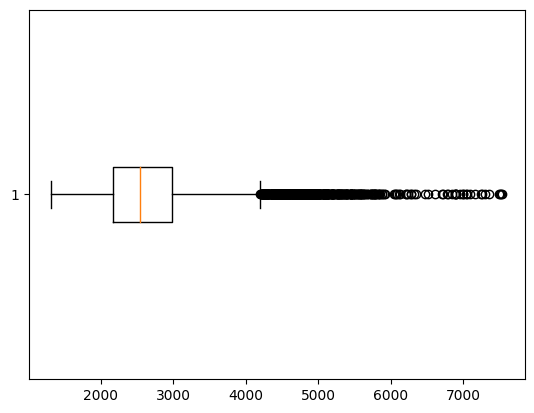

In [22]:

plt.boxplot(df['tempo_viagem'],vert=False)

In [55]:
df = df[['data_partida','tempo_viagem','predicao_xgb 14 79','predicao_xgb 70 23']]

In [56]:
df = df.loc[df['predicao_xgb 14 79'].isna() == False]

In [57]:
RRSE_xgb = np.sqrt(sum((df["tempo_viagem"] - df['predicao_xgb 14 79']) ** 2) / sum((df["tempo_viagem"] - np.mean(df["tempo_viagem"])) ** 2))
RRSE_xgb

0.7166610111086428

In [58]:
data_atual = pd.to_datetime(df["data_partida"],format='%Y-%m-%d %H:%M:%S').dt.date.min()
dias_treino = 0



a= []

while data_atual < (pd.to_datetime(df["data_partida"],format='%Y-%m-%d %H:%M:%S').dt.date.max() - timedelta(days=14)):

    df1 = df[dias_treino:dias_treino+14]

    RRSE_xgb = np.sqrt(sum((df1["tempo_viagem"] - df1['predicao_xgb 14 79']) ** 2) / sum((df1["tempo_viagem"] - np.mean(df1["tempo_viagem"])) ** 2))

    a.append(RRSE_xgb)

    dias_treino += 14
    data_atual += timedelta(days=14)

In [59]:
a

[0.9245126565742313,
 0.9828276085209823,
 1.3260508691775352,
 1.226853739125892,
 1.1906372026790222]

In [13]:
df['data_partida'] = pd.to_datetime(df["data_partida"],format='%Y-%m-%d %H:%M:%S').dt.date
b = df.groupby('data_partida').agg({'data_partida':'count'})
pd.set_option('display.max_rows', 100)
b

,data_partida
data_partida,
2019-07-01,119
2019-07-02,124
2019-07-03,121
2019-07-04,111
2019-07-05,118
2019-07-06,86
2019-07-07,54
2019-07-08,116
2019-07-09,58


In [61]:
df123 = df[0:20]

In [62]:
RRSE_xgb = np.sqrt(sum((df123["tempo_viagem"] - df123["predicao_xgb 14 79"]) ** 2) / sum((df123["tempo_viagem"] - np.mean(df123["tempo_viagem"])) ** 2))
RRSE_xgb

0.9118845730325432